## Importing libraries


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import string
import itertools
import nltk
import math

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle # To shuffle the df, since it's all 1's first and then 0's for category
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohithrajan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading the data into DataFrames

In [101]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

## Data Preparation

In [102]:
true['category'] = 1
fake['category'] = 0

In [103]:
df = pd.concat([true, fake]) 

In [104]:
# random.seed(3)
np.random.seed(0)
df = shuffle(df, random_state=3).reset_index(drop=True) # Shuffle to avoid any kind of bias in our dataset
df.head()

,title,text,subject,date,category
0,Hamas calls for Palestinian uprising against I...,GAZA (Reuters) - The powerful Palestinian Isla...,worldnews,"December 7, 2017",1
1,Trump criticizes Congress's move weakening eth...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 3, 2017",1
2,Melania's Slovenian hometown eyes Trump win as...,"SEVNICA, Slovenia (Reuters) - The small Sloven...",politicsNews,"November 9, 2016",1
3,Special Counsel Mueller filing shows Manafort ...,WASHINGTON (Reuters on Friday ) - U.S. Special...,politicsNews,"December 8, 2017",1
4,Politico Just Threw MAJOR Shade At Trump Over...,Trump is not the only U.S. leader in Europe ri...,News,"May 25, 2017",0


In [105]:
# Check to see how many observations from each category
print(Counter(df['category'])) 

Counter({0: 23481, 1: 21417})


In [106]:
# Dropping irrelevant columns for our project
df.drop(columns = ['subject', 'date'],inplace = True)

In [107]:
df

,title,text,category
0,Hamas calls for Palestinian uprising against I...,GAZA (Reuters) - The powerful Palestinian Isla...,1
1,Trump criticizes Congress's move weakening eth...,WASHINGTON (Reuters) - U.S. President-elect Do...,1
2,Melania's Slovenian hometown eyes Trump win as...,"SEVNICA, Slovenia (Reuters) - The small Sloven...",1
3,Special Counsel Mueller filing shows Manafort ...,WASHINGTON (Reuters on Friday ) - U.S. Special...,1
4,Politico Just Threw MAJOR Shade At Trump Over...,Trump is not the only U.S. leader in Europe ri...,0
...,...,...,...
44893,SICK OF HOLLYWOOD LIBERALS and PERVERTS? Here’...,"Actor Kevin Sorbo and his wife, actress Sam So...",0
44894,WATCH: MSNBC Host TORCHES Trump Campaign Mana...,Defending Satan is hard. That s what Kellyanne...,0
44895,Callista Gingrich becomes Trump's envoy to pop...,"VATICAN CITY (Reuters) - Callista Gingrich, wi...",1
44896,Mattis to review if military accidents linked ...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,1


In [162]:
# Convert the text and title to lower case
df['text'] = df['text'].str.lower()
df['title'] = df['title'].str.lower()

true['text'] = true['text'].str.lower()
true['title'] = true['title'].str.lower()

fake['text'] = fake['text'].str.lower()
fake['title'] = fake['title'].str.lower()

In [163]:
# Removing punctuation in text and title 
punctuation = set(string.punctuation)
def remove_punctuation(text):
    clean_txt = [char for char in text if char not in punctuation]
    return ''.join(clean_txt)

df['text'] = df['text'].apply(remove_punctuation)
df['title'] = df['title'].apply(remove_punctuation)

true['text'] = true['text'].apply(remove_punctuation)
true['title'] = true['title'].apply(remove_punctuation)

fake['text'] = fake['text'].apply(remove_punctuation)
fake['title'] = fake['title'].apply(remove_punctuation)

In [110]:
# Adding a new column that combines text and title
df['title_text'] = df['title'] + ' ' + df['text'] 
category = df['category']

df.drop(columns = ['category'],inplace = True)

df['category'] = category

In [111]:
df

,title,text,title_text,category
0,hamas calls for palestinian uprising against i...,gaza reuters the powerful palestinian islamis...,hamas calls for palestinian uprising against i...,1
1,trump criticizes congresss move weakening ethi...,washington reuters us presidentelect donald t...,trump criticizes congresss move weakening ethi...,1
2,melanias slovenian hometown eyes trump win as ...,sevnica slovenia reuters the small slovenian ...,melanias slovenian hometown eyes trump win as ...,1
3,special counsel mueller filing shows manafort ...,washington reuters on friday us special coun...,special counsel mueller filing shows manafort ...,1
4,politico just threw major shade at trump over...,trump is not the only us leader in europe righ...,politico just threw major shade at trump over...,0
...,...,...,...,...
44893,sick of hollywood liberals and perverts here’s...,actor kevin sorbo and his wife actress sam sor...,sick of hollywood liberals and perverts here’s...,0
44894,watch msnbc host torches trump campaign manag...,defending satan is hard that s what kellyanne ...,watch msnbc host torches trump campaign manag...,0
44895,callista gingrich becomes trumps envoy to pope...,vatican city reuters callista gingrich wife o...,callista gingrich becomes trumps envoy to pope...,1
44896,mattis to review if military accidents linked ...,washington reuters us defense secretary jim m...,mattis to review if military accidents linked ...,1


## Splitting into train and test set

We will use 3 different training and test datasets here: 
 - **Category 1:**  Training and testing on the `text` column of the dataframe -> `df['text']`
 
 - **Category 2:**  Training and testing on the `title_text` column of the dataframe -> `df['title_text']`
 
 - **Category 3:**  Training and testing on the `title` column of the dataframe -> `df['title']`    

In [112]:
# Training and Test set for Category 1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df['text'], df['category'], test_size = 0.20, random_state = 2)

In [113]:
# Training and Test set for Category 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['title_text'], df['category'], test_size = 0.20, random_state = 2)

In [114]:
# Training and Test set for Category 3
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df['title'], df['category'], test_size = 0.20, random_state = 2)

## Converting all features from strings to a suitable format using Vectorization

### Category 1 

#### Using CountVectorizer

In [115]:
vector_1 = CountVectorizer().fit(X_train_1)
vectorized_train_1 = vector_1.transform(X_train_1)
vectorized_test_1 = vector_1.transform(X_test_1)

#### Using TfidfVectorizer

In [116]:
tfid_1 = TfidfVectorizer().fit(X_train_1)
tfid_train_1 = tfid_1.transform(X_train_1)
tfid_test_1 = tfid_1.transform(X_test_1)

### Category 2

#### Using CountVectorizer

In [117]:
vector_2 = CountVectorizer().fit(X_train_2)
vectorized_train_2 = vector_2.transform(X_train_2)
vectorized_test_2 = vector_2.transform(X_test_2)

#### Using TfidfVectorizer

In [118]:
tfid_2 = TfidfVectorizer().fit(X_train_2)
tfid_train_2 = tfid_2.transform(X_train_2)
tfid_test_2 = tfid_2.transform(X_test_2)

### Category 3 

#### Using CountVectorizer

In [119]:
vector_3 = CountVectorizer().fit(X_train_3)
vectorized_train_3 = vector_3.transform(X_train_3)
vectorized_test_3 = vector_3.transform(X_test_3)

#### Using TfidfVectorizer

In [120]:
tfid_3 = TfidfVectorizer().fit(X_train_3)
tfid_train_3 = tfid_3.transform(X_train_3)
tfid_test_3 = tfid_3.transform(X_test_3)

## Exploratory Data Analysis

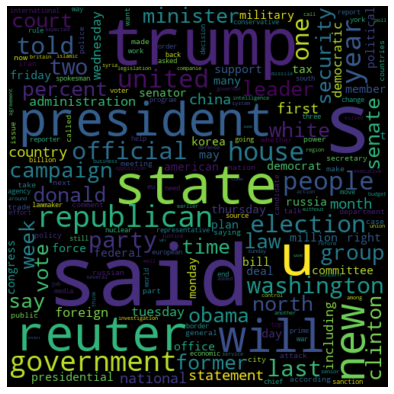

In [170]:
# Word Cloud for True News Articles -- text

all_words = ' '.join([word for word in true['text']])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

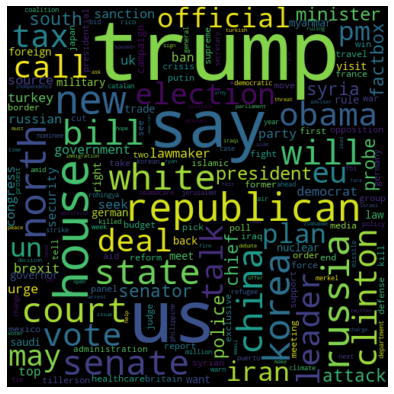

In [171]:
# Word Cloud for True News Articles -- title

all_words = ' '.join([word for word in true['title']])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

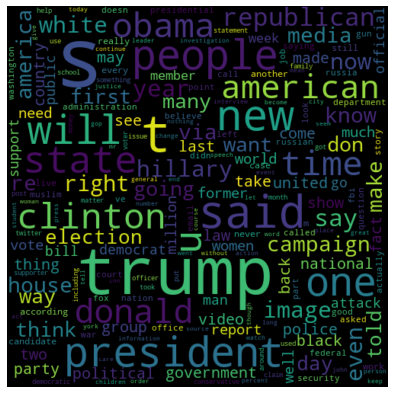

In [172]:
# Word Cloud for Fake News Articles -- text

all_words = ' '.join([word for word in fake['text']])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

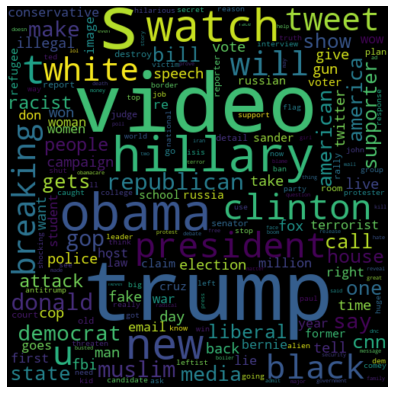

In [173]:
# Word Cloud for True News Articles -- title

all_words = ' '.join([word for word in fake['title']])
wordcloud = WordCloud(width= 500, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Creating models for Analysis

### DecisionTree 

#### Results for CountVectorizer

In [121]:
## Building the tree classifiers for all categories

tree_1 = DecisionTreeClassifier().fit(vectorized_train_1, y_train_1)

tree_2 = DecisionTreeClassifier().fit(vectorized_train_2, y_train_2)

tree_3 = DecisionTreeClassifier().fit(vectorized_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_1 = tree_1.predict(vectorized_test_1)

prediction_2 = tree_2.predict(vectorized_test_2)

prediction_3 = tree_3.predict(vectorized_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"The Decision tree for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Decision tree for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Decision tree for Category 3 has an accuracy of :{acc_3*100}%")

The Decision tree for Category 1 has an accuracy of :99.65478841870824%
The Decision tree for Category 2 has an accuracy of :99.66592427616926%
The Decision tree for Category 3 has an accuracy of :92.04899777282851%


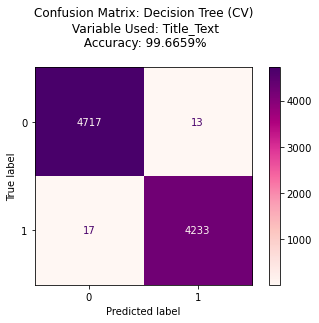

In [123]:
# Plot the confusion matrix for the highest accuracy model [Category 2]
plot_confusion_matrix(tree_2, vectorized_test_2, y_test_2, cmap = 'RdPu')
plt.title(f"Confusion Matrix: Decision Tree (CV)\n Variable Used: Title_Text\n Accuracy: {round(acc_2*100, 4)}%\n")
plt.show() 

#### Using TfidfVectorizer

In [124]:
## Building the tree classifiers for all categories

tree_tfid_1 = DecisionTreeClassifier().fit(tfid_train_1, y_train_1)

tree_tfid_2 = DecisionTreeClassifier().fit(tfid_train_2, y_train_2)

tree_tfid_3 = DecisionTreeClassifier().fit(tfid_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_tfid_1 = tree_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = tree_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = tree_tfid_3.predict(tfid_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"The Decision tree for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Decision tree for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Decision tree for Category 3 has an accuracy of :{acc_3*100}%")

The Decision tree for Category 1 has an accuracy of :99.66592427616926%
The Decision tree for Category 2 has an accuracy of :99.64365256124722%
The Decision tree for Category 3 has an accuracy of :92.24944320712694%


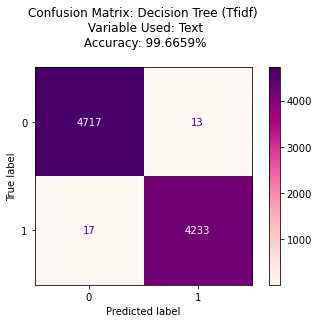

In [125]:
# Plot the confusion matrix for the highest accuracy model [Category 1]
plot_confusion_matrix(tree_tfid_1, tfid_test_1, y_test_1, cmap='RdPu')
plt.title(f"Confusion Matrix: Decision Tree (Tfidf)\n Variable Used: Text\n Accuracy: {round(acc_1*100, 4)}%\n")
plt.show() 

### SVC

#### Using CountVectorizer

In [ ]:
## Building the SVC classifiers for all categories, kernel = 'rbf'

svm_1 = SVC(kernel = 'rbf').fit(vectorized_train_1, y_train_1)

svm_2 = SVC(kernel = 'rbf').fit(vectorized_train_2, y_train_2)

svm_3 = SVC(kernel = 'rbf').fit(vectorized_train_3, y_train_3)

## Predictions for the SVC classifiers for all categories

prediction_1 = svm_1.predict(vectorized_test_1)

prediction_2 = svm_2.predict(vectorized_test_2)

prediction_3 = svm_3.predict(vectorized_test_3)

## Accuracies for the SVC classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"The SVC (rbf) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The SVC (rbf) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The SVC (rbf) for Category 3 has an accuracy of :{acc_3*100}%")

In [ ]:
## Building the SVC classifiers for all categories, kernel = 'linear'

svm_1 = SVC(kernel = 'linear').fit(vectorized_train_1, y_train_1)

svm_2 = SVC(kernel = 'linear').fit(vectorized_train_2, y_train_2)

svm_3 = SVC(kernel = 'linear').fit(vectorized_train_3, y_train_3)

## Predictions for the SVC classifiers for all categories

prediction_1 = svm_1.predict(vectorized_test_1)

prediction_2 = svm_2.predict(vectorized_test_2)

prediction_3 = svm_3.predict(vectorized_test_3)

## Accuracies for the SVC classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"The SVC (linear) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The SVC (linear) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The SVC (linear) for Category 3 has an accuracy of :{acc_3*100}%")

#### Using TfidfVectorizer

In [ ]:
## Building the SVC classifiers for all categories, kernel = 'rbf'

svm_tfid_1 = SVC(kernel = 'rbf').fit(tfid_train_1, y_train_1)

svm_tfid_2 = SVC(kernel = 'rbf').fit(tfid_train_2, y_train_2)

svm_tfid_3 = SVC(kernel = 'rbf').fit(tfid_train_3, y_train_3)

## Predictions for the SVC classifiers for all categories

prediction_tfid_1 = svm_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = svm_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = svm_tfid_3.predict(tfid_test_3)

## Accuracies for the SVC classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"The SVC (rbf) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The SVC (rbf) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The SVC (rbf) for Category 3 has an accuracy of :{acc_3*100}%")

In [ ]:
## Building the SVC classifiers for all categories, kernel = 'linear'

svm_tfid_1 = SVC(kernel = 'linear').fit(tfid_train_1, y_train_1)

svm_tfid_2 = SVC(kernel = 'linear').fit(tfid_train_2, y_train_2)

svm_tfid_3 = SVC(kernel = 'linear').fit(tfid_train_3, y_train_3)

## Predictions for the SVC classifiers for all categories

prediction_tfid_1 = svm_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = svm_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = svm_tfid_3.predict(tfid_test_3)

## Accuracies for the SVC classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"The SVC (linear) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The SVC (linear) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The SVC (linear) for Category 3 has an accuracy of :{acc_3*100}%")

### Logistic Regression 

#### Using CountVectorizer

In [126]:
## Building the tree classifiers for all categories

logistic_1 = LogisticRegression().fit(vectorized_train_1, y_train_1)

logistic_2 = LogisticRegression().fit(vectorized_train_2, y_train_2)

logistic_3 = LogisticRegression().fit(vectorized_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_1 = logistic_1.predict(vectorized_test_1)

prediction_2 = logistic_2.predict(vectorized_test_2)

prediction_3 = logistic_3.predict(vectorized_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"Logistic Regression for Category 1 has an accuracy of :{acc_1*100}%")
print(f"Logistic Regression for Category 2 has an accuracy of :{acc_2*100}%")
print(f"Logistic Regression for Category 3 has an accuracy of :{acc_3*100}%")

/Users/rohithrajan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohithrajan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

The Decision tree for Category 1 has an accuracy of :99.6325167037862%
The Decision tree for Category 2 has an accuracy of :99.64365256124722%
The Decision tree for Category 3 has an accuracy of :96.48106904231626%


/Users/rohithrajan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


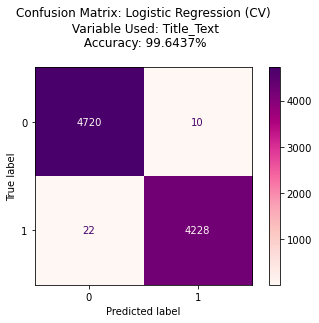

In [127]:
# Plot the confusion matrix for the highest accuracy model [Category 2]
plot_confusion_matrix(logistic_2, vectorized_test_2, y_test_2, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Logistic Regression (CV)\n Variable Used: Title_Text\n Accuracy: {round(acc_2*100, 4)}%\n")
plt.show() 

#### Using TfidfVectorizer

In [128]:
## Building the tree classifiers for all categories

logistic_tfid_1 = LogisticRegression().fit(tfid_train_1, y_train_1)

logistic_tfid_2 = LogisticRegression().fit(tfid_train_2, y_train_2)

logistic_tfid_3 = LogisticRegression().fit(tfid_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_tfid_1 = logistic_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = logistic_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = logistic_tfid_3.predict(tfid_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"Logistic Regression for Category 1 has an accuracy of :{acc_1*100}%")
print(f"Logistic Regression for Category 2 has an accuracy of :{acc_2*100}%")
print(f"Logistic Regression for Category 3 has an accuracy of :{acc_3*100}%")

The Decision tree for Category 1 has an accuracy of :98.89755011135858%
The Decision tree for Category 2 has an accuracy of :98.9086859688196%
The Decision tree for Category 3 has an accuracy of :95.44543429844097%


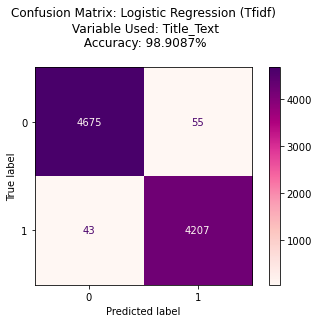

In [129]:
# Plot the confusion matrix for the highest accuracy model [Category 2]
plot_confusion_matrix(logistic_tfid_2, tfid_test_2, y_test_2, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Logistic Regression (Tfidf)\n Variable Used: Title_Text\n Accuracy: {round(acc_2*100, 4)}%\n")
plt.show() 

### RandomForest 

#### Using CountVectorizer

In [130]:
## Building the tree classifiers for all categories, criterion = 'gini'

forest_1 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(vectorized_train_1, y_train_1)

forest_2 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(vectorized_train_2, y_train_2)

forest_3 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(vectorized_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_1 = forest_1.predict(vectorized_test_1)

prediction_2 = forest_2.predict(vectorized_test_2)

prediction_3 = forest_3.predict(vectorized_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"The Random Forest (gini) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Random Forest (gini) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Random Forest (gini) for Category 3 has an accuracy of :{acc_3*100}%")

The Random Forest (gini) for Category 1 has an accuracy of :98.54120267260579%
The Random Forest (gini) for Category 2 has an accuracy of :97.95100222717149%
The Random Forest (gini) for Category 3 has an accuracy of :94.96659242761693%


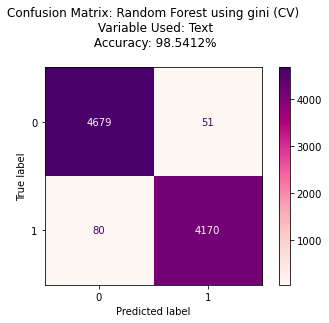

In [131]:
# Plot the confusion matrix for the highest accuracy model, [Category 1]
plot_confusion_matrix(forest_1, vectorized_test_1, y_test_1, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Random Forest using gini (CV)\n Variable Used: Text\n Accuracy: {round(acc_1*100, 4)}%\n")
plt.show() 

In [132]:
## Building the tree classifiers for all categories, criterion = 'entropy'

forest_1 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(vectorized_train_1, y_train_1)

forest_2 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(vectorized_train_2, y_train_2)

forest_3 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(vectorized_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_1 = forest_1.predict(vectorized_test_1)

prediction_2 = forest_2.predict(vectorized_test_2)

prediction_3 = forest_3.predict(vectorized_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"The Random Forest (entropy) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Random Forest (entropy) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Random Forest (entropy) for Category 3 has an accuracy of :{acc_3*100}%")

The Random Forest (entropy) for Category 1 has an accuracy of :98.29621380846325%
The Random Forest (entropy) for Category 2 has an accuracy of :98.17371937639197%
The Random Forest (entropy) for Category 3 has an accuracy of :94.7327394209354%


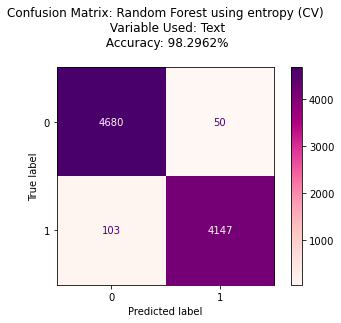

In [133]:
# Plot the confusion matrix for the highest accuracy model, [Category 1]
plot_confusion_matrix(forest_1, vectorized_test_1, y_test_1, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Random Forest using entropy (CV)\n Variable Used: Text\n Accuracy: {round(acc_1*100, 4)}%\n")
plt.show() 

#### Using TfidfVectorizer

In [134]:
## Building the tree classifiers for all categories, criterion = 'gini'

forest_tfid_1 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(tfid_train_1, y_train_1)

forest_tfid_2 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(tfid_train_2, y_train_2)

forest_tfid_3 = RandomForestClassifier(n_estimators = 30, criterion = 'gini').fit(tfid_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_tfid_1 = forest_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = forest_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = forest_tfid_3.predict(tfid_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"The Random Forest (gini) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Random Forest (gini) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Random Forest (gini) for Category 3 has an accuracy of :{acc_3*100}%")

The Random Forest (gini) for Category 1 has an accuracy of :98.16258351893096%
The Random Forest (gini) for Category 2 has an accuracy of :97.8619153674833%
The Random Forest (gini) for Category 3 has an accuracy of :95.10022271714922%


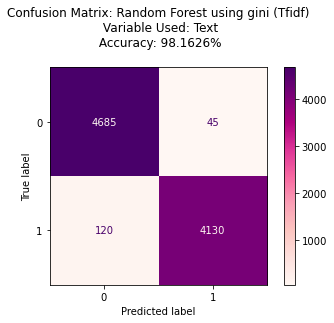

In [135]:
# Plot the confusion matrix for the highest accuracy model, [Category 1]
plot_confusion_matrix(forest_tfid_1, tfid_test_1, y_test_1, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Random Forest using gini (Tfidf)\n Variable Used: Text\n Accuracy: {round(acc_1*100, 4)}%\n")
plt.show() 

In [136]:
## Building the tree classifiers for all categories, criterion = 'entropy'

forest_tfid_1 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(tfid_train_1, y_train_1)

forest_tfid_2 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(tfid_train_2, y_train_2)

forest_tfid_3 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(tfid_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_tfid_1 = forest_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = forest_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = forest_tfid_3.predict(tfid_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"The Random Forest (entropy) for Category 1 has an accuracy of :{acc_1*100}%")
print(f"The Random Forest (entropy) for Category 2 has an accuracy of :{acc_2*100}%")
print(f"The Random Forest (entropy) for Category 3 has an accuracy of :{acc_3*100}%")

The Random Forest (entropy) for Category 1 has an accuracy of :98.30734966592428%
The Random Forest (entropy) for Category 2 has an accuracy of :98.32962138084632%
The Random Forest (entropy) for Category 3 has an accuracy of :95.06681514476615%


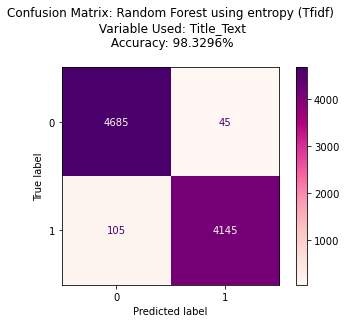

In [137]:
# Plot the confusion matrix for the highest accuracy model, Category 2
plot_confusion_matrix(forest_tfid_2, tfid_test_2, y_test_2, cmap = 'RdPu') 
plt.title(f"Confusion Matrix: Random Forest using entropy (Tfidf)\n Variable Used: Title_Text\n Accuracy: {round(acc_2*100, 4)}%\n")
plt.show() 

### Näive Bayes 

#### Using CountVectorizer

In [138]:
## Building the tree classifiers for all categories

nb_1 = MultinomialNB().fit(vectorized_train_1, y_train_1)

nb_2 = MultinomialNB().fit(vectorized_train_2, y_train_2)

nb_3 = MultinomialNB().fit(vectorized_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_1 = nb_1.predict(vectorized_test_1)

prediction_2 = nb_2.predict(vectorized_test_2)

prediction_3 = nb_3.predict(vectorized_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_3)

print(f"Näive Bayes for Category 1 has an accuracy of :{acc_1*100}%")
print(f"Näive Bayes for Category 2 has an accuracy of :{acc_2*100}%")
print(f"Näive Bayes for Category 3 has an accuracy of :{acc_3*100}%")

Näive Bayes for Category 1 has an accuracy of :95.43429844097996%
Näive Bayes for Category 2 has an accuracy of :95.71269487750557%
Näive Bayes for Category 3 has an accuracy of :95.27839643652561%


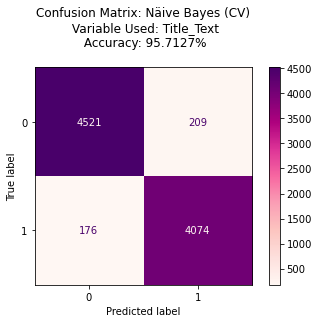

In [139]:
# Plot the confusion matrix for the highest accuracy model, [Category 2]
plot_confusion_matrix(nb_2, vectorized_test_2,y_test_2, cmap = 'RdPu')
plt.title(f"Confusion Matrix: Näive Bayes (CV)\n Variable Used: Title_Text\n Accuracy: {round(acc_2*100, 4)}%\n")
plt.show() 

#### Using TfidfVectorizer

In [140]:
## Building the tree classifiers for all categories

nb_tfid_1 = MultinomialNB().fit(tfid_train_1, y_train_1)

nb_tfid_2 = MultinomialNB().fit(tfid_train_2, y_train_2)

nb_tfid_3 = MultinomialNB().fit(tfid_train_3, y_train_3)

## Predictions for the tree classifiers for all categories

prediction_tfid_1 = nb_tfid_1.predict(tfid_test_1)

prediction_tfid_2 = nb_tfid_2.predict(tfid_test_2)

prediction_tfid_3 = nb_tfid_3.predict(tfid_test_3)

## Accuracies for the tree classifiers for all categories

acc_1 = metrics.accuracy_score(y_test_1, prediction_tfid_1)

acc_2 = metrics.accuracy_score(y_test_2, prediction_tfid_2)

acc_3 = metrics.accuracy_score(y_test_3, prediction_tfid_3)

print(f"Näive Bayes for Category 1 has an accuracy of :{acc_1*100}%")
print(f"Näive Bayes for Category 2 has an accuracy of :{acc_2*100}%")
print(f"Näive Bayes for Category 3 has an accuracy of :{acc_3*100}%")

Näive Bayes for Category 1 has an accuracy of :93.88641425389756%
Näive Bayes for Category 2 has an accuracy of :94.20935412026726%
Näive Bayes for Category 3 has an accuracy of :94.71046770601336%


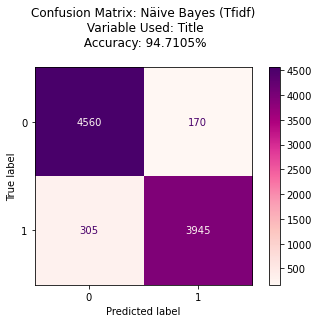

In [141]:
# Plot the confusion matrix for the highest accuracy model, [Category 3]
plot_confusion_matrix(nb_tfid_3, tfid_test_3,y_test_3, cmap = 'RdPu')  
plt.title(f"Confusion Matrix: Näive Bayes (Tfidf)\n Variable Used: Title\n Accuracy: {round(acc_3*100, 4)}%\n")
plt.show() 

### After Removing Stop words

In [142]:
stop_words = set(stopwords.words('english')) # stopwords is imported in the first cell 

def remove_stop_words(text):
    clean_text = [word for word in text.split() if word not in stop_words]
    return ' '.join(clean_text)
    
no_stop = df['title_text'].apply(remove_stop_words)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(no_stop, df['category'], test_size = 0.20, random_state = 2)

In [144]:
vector = CountVectorizer().fit(X_train)
vectorized_train = vector.transform(X_train)
vectorized_test = vector.transform(X_test)

In [145]:
tfid = TfidfVectorizer().fit(X_train)
tfid_train = tfid.transform(X_train)
tfid_test = tfid.transform(X_test)

In [146]:
tree = DecisionTreeClassifier().fit(vectorized_train, y_train)

prediction = tree.predict(vectorized_test)
metrics.accuracy_score(y_test, prediction)

In [148]:
tree_tfid = DecisionTreeClassifier().fit(tfid_train, y_train)

prediction_tfid = tree_tfid.predict(tfid_test)
metrics.accuracy_score(y_test, prediction_tfid)

In [152]:
nb = MultinomialNB().fit(vectorized_train, y_train)

prediction = nb.predict(vectorized_test)
metrics.accuracy_score(y_test, prediction)

0.9614699331848552

In [153]:
nb_tfid = MultinomialNB().fit(tfid_train, y_train)

prediction_tfid = nb_tfid.predict(tfid_test)
metrics.accuracy_score(y_test, prediction_tfid)

0.9462138084632516

In [ ]:
rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(vectorized_train, y_train)

prediction = rf.predict(vectorized_test)
metrics.accuracy_score(y_test, prediction)

In [ ]:
rf_tfid = RandomForestClassifier(n_estimators = 30, criterion = 'entropy').fit(tfid_train, y_train)

prediction = rf_tfid.predict(tfid_test)
metrics.accuracy_score(y_test, prediction)